## Step 1: Load Data
We start by downloading and loading the dataset `data_ffnn.txt`. The file consists of three columns: `x1`, `x2`, and `y`. This is a multi-class problem.


In [840]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = "data_ffnn.txt"  # Ensure this file is in your working directory
data = pd.read_csv(file_path, delim_whitespace=True, header=0, names=['x1', 'x2', 'y'])

# Display the first few rows
print(data.head())


         x1        x2  y
0  0.015546  0.807941  3
1  0.004527  1.426791  3
2  1.358103  1.193950  3
3  1.372911  0.218337  3
4  0.236595  0.281448  3


## Step 2: Plot the Data
Visualize the data in 2D, coloring each point according to its class.


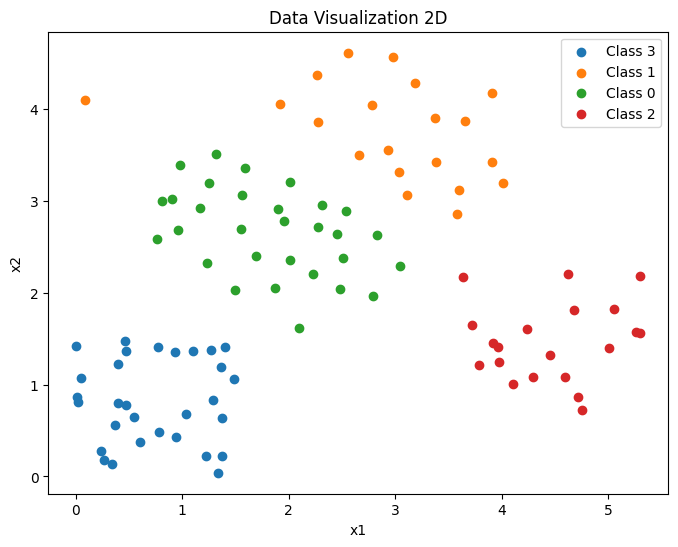

In [841]:
# Plot the data
plt.figure(figsize=(8, 6))
for label in data['y'].unique():
    subset = data[data['y'] == label]
    plt.scatter(subset['x1'], subset['x2'], label=f'Class {label}')
    
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data Visualization 2D')
plt.legend()
plt.show()


## Step 3: Forward Propagation
We implement forward propagation for a feedforward neural network with three layers. The hidden layer will have `K` neurons.


In [842]:
def forward_propagation(X, V, W):
    """
    Perform forward propagation through the neural network.
    
    Parameters:
    -----------
    X : array-like
        Input data of shape (n_samples, n_features)
    V : array-like
        Weight matrix for hidden layer
    W : array-like
        Weight matrix for output layer
    
    Returns:
    --------
    dict
        Dictionary containing:
        - X_bar: Input data with bias term
        - X_bar_bar: Input to hidden layer
        - F: Hidden layer activation
        - F_bar: Hidden layer output with bias
        - F_bar_bar: Input to output layer
        - G: Network output
    """
    # Add bias term to input
    X_bar = np.hstack((np.ones((X.shape[0], 1)), X))
    
    # Hidden layer
    X_bar_bar = np.dot(X_bar, V)
    F = 1 / (1 + np.exp(-X_bar_bar))  # sigmoid activation
    F_bar = np.hstack((np.ones((F.shape[0], 1)), F))
    F_bar_bar = np.dot(F_bar, W)
    
    # Output layer
    G = 1 / (1 + np.exp(-F_bar_bar))  # Sigmoid activation
    
    # Store all intermediate values
    results = {
        'X_bar': X_bar,
        'X_bar_bar': X_bar_bar,
        'F': F,
        'F_bar': F_bar,
        'F_bar_bar': F_bar_bar,
        'G': G
    }
    
    return results

# Define network parameters
N = 2  # input features
K = 4  # hidden neurons
J = len(data['y'].unique())  # output classes

# Initialize weights
V = np.random.randn(N + 1, K)
W = np.random.randn(K + 1, J)

# Prepare input data
X = data[['x1', 'x2']].values

# Perform forward propagation
results = forward_propagation(X, V, W)

# Create one-hot encoded target
y_true_onehot = np.eye(J)[data['y'].astype(int)]

X_bar = results['X_bar']
F_bar = results['F_bar']
F = results['F']
G = results['G']

# Calculate error
E = 0.5 * np.sum((results['G'] - y_true_onehot) ** 2)
print(f"Error: {E:.4f}")

y_pred = np.argmax(results['G'], axis=1)
print("\nFirst few predictions vs actual:")
for i in range(5):
    print(f"Predicted: {y_pred[i]}, Actual: {data['y'].iloc[i]}")

Error: 59.5694

First few predictions vs actual:
Predicted: 1, Actual: 3
Predicted: 1, Actual: 3
Predicted: 1, Actual: 3
Predicted: 1, Actual: 3
Predicted: 1, Actual: 3


## Step 4: back propagation


In [843]:
# Define the learning rates
alpha_1, alpha_2 = 10**-3, 10**-3

# Define the number of iterations
iterations = 0

# Define a threshold
threshold = 10**-2

# Define an error array
errors = [10**-5,E]



In [844]:
def backpropagation(V_BP, W_BP, X_bar_BP, F_BP, F_bar_BP, G_BP, y_one_hot_BP, alpha_1_BP, alpha_2_BP):

    # Step 1: Calculate output layer error
    delta_G = G_BP * (1 - G_BP) * (G_BP - y_one_hot_BP)
    
    # Step 2: Calculate hidden layer error
    
    # First, get the term coming from the next layer
    dGxWT = np.dot(delta_G, W_BP.T)
    
    # Calculate δf while excluding the bias thats why we do * back_term[:, 1:]
    delta_F = F_BP * (1 - F_BP) * dGxWT[:, 1:]
    
    # Step 3: Calculate gradients
    
    # For output layer weights (W)
    dE_dW = np.dot(F_bar_BP.T, delta_G)
    
    # For hidden layer weights (V)
    dE_dV = np.dot(X_bar_BP.T, delta_F)
    
    # Step 4: Update weights
    
    # Update W and V using gradient descent
    W_new = W_BP - alpha_1_BP * dE_dW
    V_new = V_BP - alpha_2_BP * dE_dV
    
    return W_new, V_new


In [845]:
while abs(errors[-1] - errors[-2]) > threshold or iterations < 10000:
    
    iterations += 1
    
    # Backpropagation and weight updates
    W, V = backpropagation(V, W, X_bar, F, F_bar, G, y_true_onehot, alpha_1, alpha_2)
    
    # Forward propagation
    results = forward_propagation(X, V, W)
    X_bar_bar = results['X_bar_bar']
    F = results['F']
    F_bar = results['F_bar']
    F_bar_bar = results['F_bar_bar']
    G = results['G']
    
    # Calculate errors
    E = 0.5 * np.sum((G - y_true_onehot) ** 2)
    errors.append(E)
    
    if iterations % 1000 == 0:
        print(f"Iteration {iterations}, Error: {E}")
        
# Final results
print("\nFinal Error:", errors[-1])
print("Number of iterations:", len(errors))
    


Iteration 1000, Error: 27.246454350406346
Iteration 2000, Error: 23.13768201049873
Iteration 3000, Error: 18.42670203498185
Iteration 4000, Error: 15.150437561823596
Iteration 5000, Error: 12.99620157992512
Iteration 6000, Error: 11.415809380736382
Iteration 7000, Error: 10.133356888729164
Iteration 8000, Error: 9.031246125990567
Iteration 9000, Error: 8.07149802914157
Iteration 10000, Error: 7.243470329722589

Final Error: 7.243470329722589
Number of iterations: 10002


## Step 5: Plotting the errors

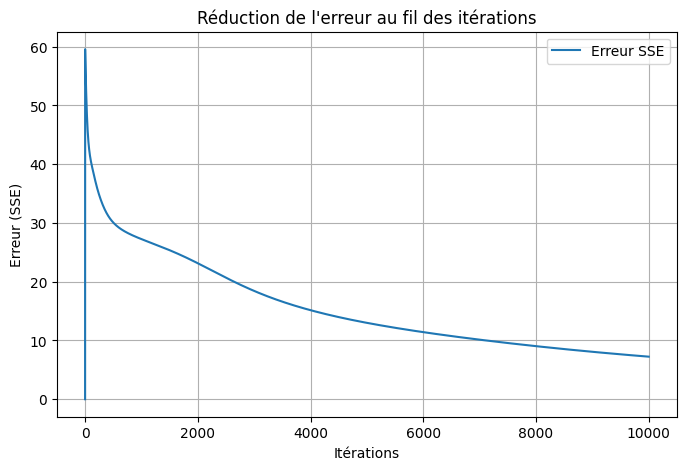

In [846]:
# Tracer la réduction de l'erreur
plt.figure(figsize=(8, 5))
plt.plot(errors, label="Erreur SSE")
plt.xlabel("Itérations")
plt.ylabel("Erreur (SSE)")
plt.title("Réduction de l'erreur au fil des itérations")
plt.legend()
plt.grid()
plt.show()

## Step 6: Optimal parameters

In [847]:
def display_parameters(V, W):
    """
    Display the learned parameters V and W in a simplified format
    """
    # Display hidden layer weights (V)
    print("\nHidden Layer Parameters (V):")
    print("-" * 40)
    v_df = pd.DataFrame(V, 
                       index=['bias', 'x1', 'x2'],
                       columns=[f'h{i+1}' for i in range(V.shape[1])])
    print(v_df)
    
    # Display output layer weights (W)
    print("\nOutput Layer Parameters (W):")
    print("-" * 40)
    w_df = pd.DataFrame(W,
                       index=['bias'] + [f'h{i+1}' for i in range(V.shape[1])],
                       columns=[f'output{i+1}' for i in range(W.shape[1])])
    print(w_df)
    
    # Display feature importance
    print("\nFeature Importance:")
    print("-" * 40)
    input_importance = np.abs(V[1:, :]).mean(axis=1)
    features = ['x1', 'x2']
    for feature, importance in zip(features, input_importance):
        print(f"{feature}: {importance:.4f}")

# Call the function with the optimal weights
display_parameters(V, W)


Hidden Layer Parameters (V):
----------------------------------------
            h1        h2        h3        h4
bias  0.476336  5.812583 -2.344878  4.505285
x1    0.593083 -1.602602 -0.936165 -0.465327
x2    0.610906 -0.657070  2.245062 -2.568195

Output Layer Parameters (W):
----------------------------------------
       output1   output2   output3   output4
bias -0.093567  0.574911 -0.919146 -1.764381
h1   -1.515871 -1.969021  3.104605 -2.525317
h2    3.313552 -3.932144 -4.408183  4.472128
h3    0.215761  3.417342 -4.109599 -2.266318
h4   -4.636247 -3.649644  1.153396  3.174795

Feature Importance:
----------------------------------------
x1: 0.8993
x2: 1.5203


## Step 7: plotting training outputs values vs Predicted values

Classification Accuracy: 97.00%


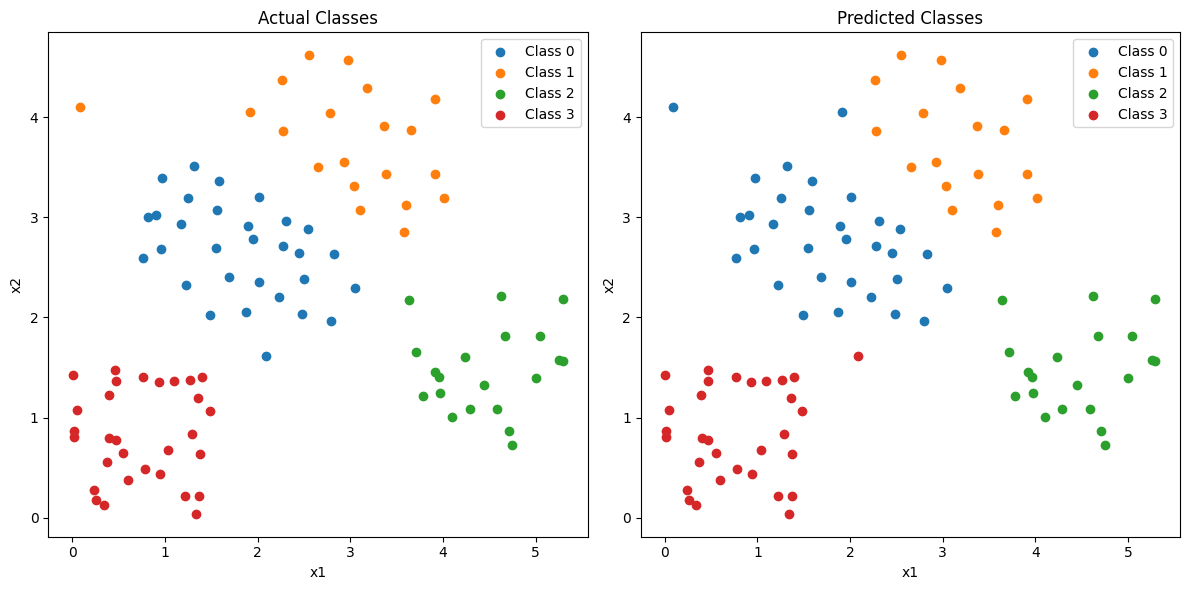


Detailed Comparison (first 10 samples):
Sample	Actual	Predicted
------------------------------
0	3	3
1	3	3
2	3	3
3	3	3
4	3	3
5	3	3
6	3	3
7	3	3
8	3	3
9	3	3


In [848]:
# Get predictions for training data
results = forward_propagation(X, V, W)
predicted_outputs = results['G']
predicted_classes = np.argmax(predicted_outputs, axis=1)
actual_classes = data['y'].values

# Calculate accuracy
accuracy = np.mean(predicted_classes == actual_classes)
print(f"Classification Accuracy: {accuracy * 100:.2f}%")

# Plot predicted vs actual classes
plt.figure(figsize=(12, 6))

# Plot actual classes
plt.subplot(121)
for label in np.unique(actual_classes):
    mask = actual_classes == label
    plt.scatter(X[mask, 0], X[mask, 1], label=f'Class {label}')
plt.title('Actual Classes')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

# Plot predicted classes
plt.subplot(122)
for label in np.unique(predicted_classes):
    mask = predicted_classes == label
    plt.scatter(X[mask, 0], X[mask, 1], label=f'Class {label}')
plt.title('Predicted Classes')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

plt.tight_layout()
plt.show()

# Print detailed comparison
print("\nDetailed Comparison (first 10 samples):")
print("Sample\tActual\tPredicted")
print("-" * 30)
for i in range(10):
    print(f"{i}\t{actual_classes[i]}\t{predicted_classes[i]}")

## Step 8: Testing the model with values


Test Results:
------------------------------------------------------------
Test Point (x1, x2) | Predicted Class | Class Probabilities
------------------------------------------------------------
T1: (0.0, 0.0)   | Class 3      | 0.092 0.000 0.068 0.983
T2: (2.0, 2.0)   | Class 0      | 0.596 0.044 0.027 0.201
T3: (4.0, 4.0)   | Class 1      | 0.219 0.846 0.131 0.002
T4: (4.5, 1.5)   | Class 2      | 0.101 0.095 0.860 0.034


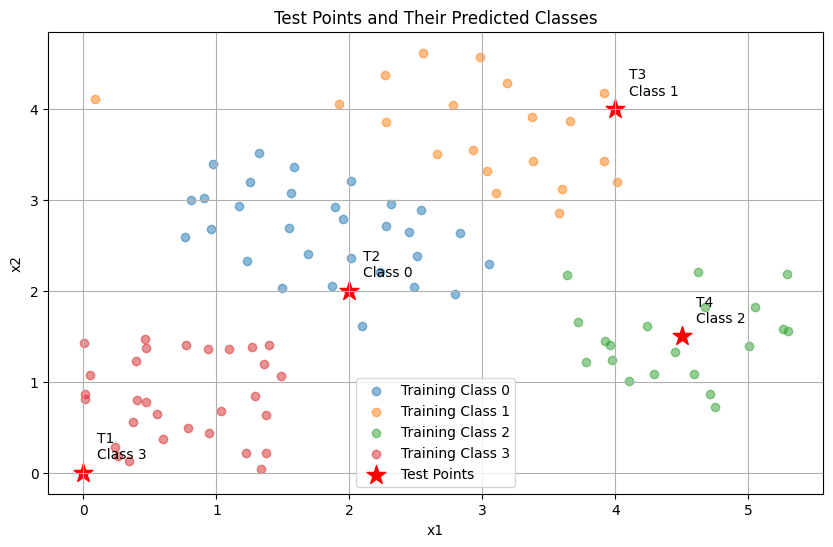


Prediction Confidences:
----------------------------------------
Test Point 1: 0.983
Test Point 2: 0.596
Test Point 3: 0.846
Test Point 4: 0.860


In [849]:
# Test data points
X_test = np.array([
    [0, 0],    # Test point 1
    [2, 2],    # Test point 2
    [4, 4],    # Test point 3
    [4.5, 1.5] # Test point 4
])

# Perform forward propagation on test data
test_output = forward_propagation(X_test, V, W)

# Get predicted classes
predicted_classes = np.argmax(test_output['G'], axis=1)

# Print results
print("\nTest Results:")
print("-" * 60)
print("Test Point (x1, x2) | Predicted Class | Class Probabilities")
print("-" * 60)

for i, (point, pred_class, probs) in enumerate(zip(X_test, predicted_classes, test_output['G'])):
    prob_str = ' '.join([f'{p:.3f}' for p in probs])
    print(f"T{i+1}: ({point[0]:.1f}, {point[1]:.1f})   | Class {pred_class}      | {prob_str}")

# Visualize the results
plt.figure(figsize=(10, 6))

# Plot training data
for label in np.unique(data['y']):
    mask = data['y'] == label
    plt.scatter(data[mask]['x1'], data[mask]['x2'], 
               alpha=0.5, label=f'Training Class {label}')

# Plot test points
plt.scatter(X_test[:, 0], X_test[:, 1], 
           color='red', marker='*', s=200, 
           label='Test Points')

# Add annotations for test points
for i, (x, y) in enumerate(X_test):
    plt.annotate(f'T{i+1}\nClass {predicted_classes[i]}', 
                (x, y), xytext=(10, 10), 
                textcoords='offset points')

plt.title('Test Points and Their Predicted Classes')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.show()

# Calculate prediction confidence
confidences = np.max(test_output['G'], axis=1)
print("\nPrediction Confidences:")
print("-" * 40)
for i, conf in enumerate(confidences):
    print(f"Test Point {i+1}: {conf:.3f}")

## Step 9: Plot classification results

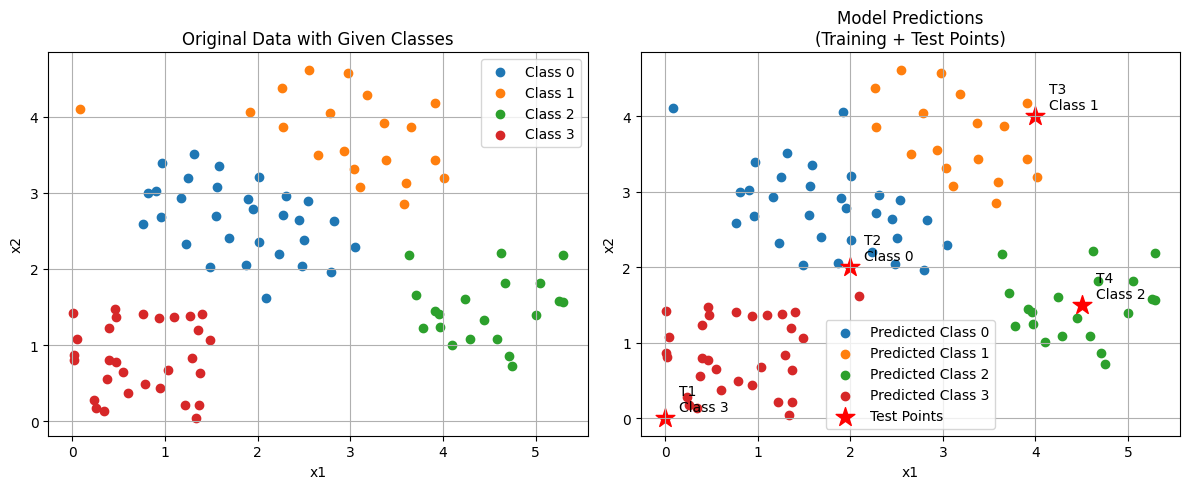


Test Point Classifications:
--------------------------------------------------
Point (x1, x2)      | Predicted Class
--------------------------------------------------
T1: (0.0, 0.0)  | Class 3
T2: (2.0, 2.0)  | Class 0
T3: (4.0, 4.0)  | Class 1
T4: (4.5, 1.5)  | Class 2


In [850]:
import matplotlib.pyplot as plt

# Create subplots for comparison
plt.figure(figsize=(12, 5))

# 1. Original Data Plot (Given classes)
plt.subplot(121)
for label in np.unique(data['y']):
    mask = data['y'] == label
    plt.scatter(data[mask]['x1'], data[mask]['x2'], 
               label=f'Class {label}')

plt.title('Original Data with Given Classes')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)

# 2. Model Predictions (Training + Test points)
plt.subplot(122)

# Get predictions for training data
train_output = forward_propagation(X, V, W)
train_pred = np.argmax(train_output['G'], axis=1)

# Plot training predictions
for label in np.unique(train_pred):
    mask = train_pred == label
    plt.scatter(X[mask, 0], X[mask, 1], 
               label=f'Predicted Class {label}')

# Get and plot test predictions
test_output = forward_propagation(X_test, V, W)
test_pred = np.argmax(test_output['G'], axis=1)
plt.scatter(X_test[:, 0], X_test[:, 1], 
           color='red', marker='*', s=200,
           label='Test Points')

# Label test points
for i, (x, y) in enumerate(X_test):
    plt.annotate(f'T{i+1}\nClass {test_pred[i]}', 
                (x, y), xytext=(10, 5),
                textcoords='offset points')

plt.title('Model Predictions\n(Training + Test Points)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print test point predictions
print("\nTest Point Classifications:")
print("-" * 50)
print("Point (x1, x2)      | Predicted Class")
print("-" * 50)
for i, (point, pred) in enumerate(zip(X_test, test_pred)):
    print(f"T{i+1}: ({point[0]:.1f}, {point[1]:.1f})  | Class {pred}")